<a href="https://colab.research.google.com/github/guilhermelaviola/FantasySoccer/blob/main/USSRNTStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
!pip install python-dateutil

In [34]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
from datetime import date

# **Collecting the data**

This data has been collected from the national football team Wikipedia pages of the countries that were once part of USSR.

In [35]:
# Importing the dataset:
former_countries = pd.ExcelFile('former-countries.xlsx')
ussr = pd.read_excel(former_countries, 'ussr-raw')

# Displaying the last 5 row:
ussr.tail()

,Nationality,Number,Position,Player,Date of birth,Matches,Goals,Club
639,Uzbekistan,NaN,MF,Diyor Kholmatov,22 July 2002 (age 22),5,0,Uzbekistan Pakhtakor
640,Uzbekistan,NaN,MF,Shokhboz Umarov,9 March 1999 (age 25),5,0,Kazakhstan Ordabasy
641,Uzbekistan,NaN,MF,Jamshid Boltaboev,3 October 1996 (age 28),4,0,Uzbekistan Navbahor
642,Uzbekistan,NaN,FW,Oston Urunov,19 December 2000 (age 23),32,8,Iran Persepolis
643,Uzbekistan,NaN,FW,Igor Sergeyev,30 April 1993 (age 31),73,19,Thailand BG Pathum United


In [36]:
# Displaying the number of rows and columns in the dataset:
ussr.shape

(644, 8)

In [37]:
# Displaying the datatypes presented in the columns:
ussr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Nationality    644 non-null    object
 1   Number         277 non-null    object
 2   Position       644 non-null    object
 3   Player         644 non-null    object
 4   Date of birth  644 non-null    object
 5   Matches        644 non-null    int64 
 6   Goals          644 non-null    int64 
 7   Club           644 non-null    object
dtypes: int64(2), object(6)
memory usage: 40.4+ KB


In [38]:
# Displaying general statistical information of the number data present in the dataset:
ussr.describe()

,Matches,Goals
count,644.000000,644.000000
mean,19.750000,1.635093
std,23.197936,4.002186
min,0.000000,0.000000
25%,3.000000,0.000000
50%,11.000000,0.000000
75%,29.000000,1.000000
max,158.000000,46.000000


# **Cleaning and transforming the data**

Columns to work on the data cleaning/transformation:
*   Position: Convert from the abbreviation to the actual position (e.g: GK to Goalkeeper).
*   Captain?: Based on the data in the 'Player' column, this column has got to have values such as 'captain', 'vice-captain', 'third-captain' or 'No'.

*   Player: Clean additional data, by removing words such as 'RET', 'INJ' or '(captain)'. Only the player name shall be displayed in this column.
*   Date of birth: Remove the ' (age xx)' after the actual date of birth, so this date can be converted to a datetime object.
*   Club: The club country name shown before the  club name shall be removed.

In [39]:
# Replacing abbreviations in the 'Position' column:
position_mapping = {
    'GK': '1. Goalkeeper',
    'DF': '2. Defender',
    'MF': '3. Midfielder',
    'FW': '4. Striker'
}

ussr['Position'] = ussr['Position'].replace(position_mapping)

# Creating the 'Captain?' column based on the 'Player' column:
def determine_captain_status(player):
    if '(captain)' in player:
        return 'First'
    elif '(vice-captain)' in player:
        return 'Second'
    elif '(third-captain)' in player:
        return 'Third'
    elif '(fourth-captain)' in player:
        return 'Fourth'
    else:
        return 'No'

ussr['Captain?'] = ussr['Player'].apply(determine_captain_status)

# Removing annotations from the 'Player' column:
ussr['Player'] = ussr['Player'].str.replace(r'\s*\(Captain\)|\s*\(captain\)|\s*\(vice-captain\)|\s*\(third-captain\)|\s*\(fourth-captain\)', '', regex=True).str.strip()

# Removing rows with 'RET' in the 'Player' column:
ussr = ussr[~ussr['Player'].str.contains(r'\bRET\b', na=False)]

# Cleaning the 'Player' column:
ussr['Player'] = ussr['Player'].str.replace(r'\s*(INJ|\(captain\)|\(vice-captain\)|\(third-captain\))', '', regex=True).str.strip()

# Cleaning the 'Date of birth' column:
ussr['Date of birth'] = ussr['Date of birth'].str.replace(r'\s*\(age\s*\d+\)', '', regex=True)

# Spliting 'Club' column into 'Club country' and 'Club' columns:
ussr[['Club country', 'Club']] = ussr['Club'].str.split(' ', n=1, expand=True)
# Pass 'expand=True' as a keyword argument, and 'n=1' for the max splits

# Rearranging the columns:
ussr = ussr[['Number', 'Position', 'Player', 'Date of birth', 'Matches', 'Goals', 'Club', 'Club country', 'Captain?', 'Nationality']]

# Converting the 'Date of birth' to datetime object:
#pd.to_datetime(ussr['Date of birth'])
ussr['Date of birth'] = ussr['Date of birth'].astype('datetime64[ns]')

# Displaying the last 5 row:
ussr.tail()

<ipython-input-39-5a4298a1100b>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ussr['Player'] = ussr['Player'].str.replace(r'\s*(INJ|\(captain\)|\(vice-captain\)|\(third-captain\))', '', regex=True).str.strip()
<ipython-input-39-5a4298a1100b>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ussr['Date of birth'] = ussr['Date of birth'].str.replace(r'\s*\(age\s*\d+\)', '', regex=True)
<ipython-input-39-5a4298a1100b>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

,Number,Position,Player,Date of birth,Matches,Goals,Club,Club country,Captain?,Nationality
639,NaN,3. Midfielder,Diyor Kholmatov,2002-07-22,5,0,Pakhtakor,Uzbekistan,No,Uzbekistan
640,NaN,3. Midfielder,Shokhboz Umarov,1999-03-09,5,0,Ordabasy,Kazakhstan,No,Uzbekistan
641,NaN,3. Midfielder,Jamshid Boltaboev,1996-10-03,4,0,Navbahor,Uzbekistan,No,Uzbekistan
642,NaN,4. Striker,Oston Urunov,2000-12-19,32,8,Persepolis,Iran,No,Uzbekistan
643,NaN,4. Striker,Igor Sergeyev,1993-04-30,73,19,BG Pathum United,Thailand,No,Uzbekistan


In [40]:
# Exporting the cleaned dataset to a new Excel file:
ussr.to_excel('data_cleaned.xlsx')

# **Displaying the data**

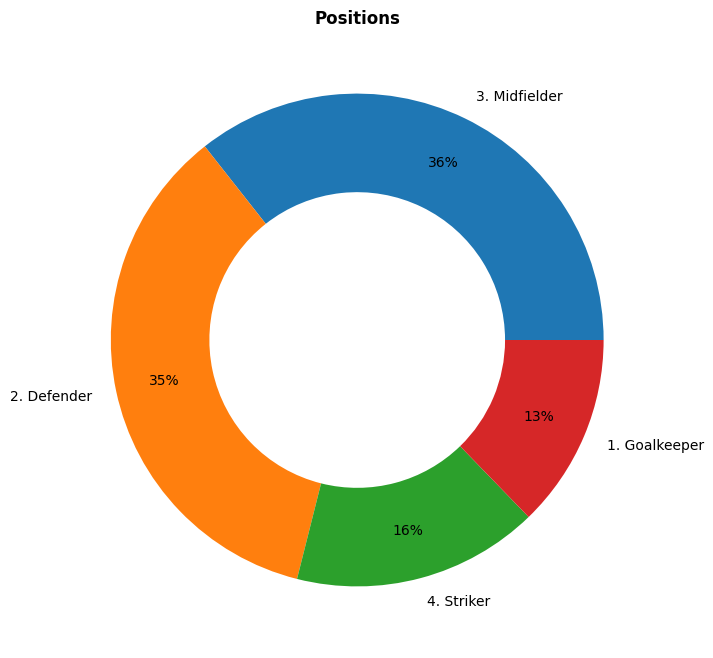

In [41]:
# Displaying the player's positions:
ussr['Position'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Positions', fontweight = 'bold')
plt.show()

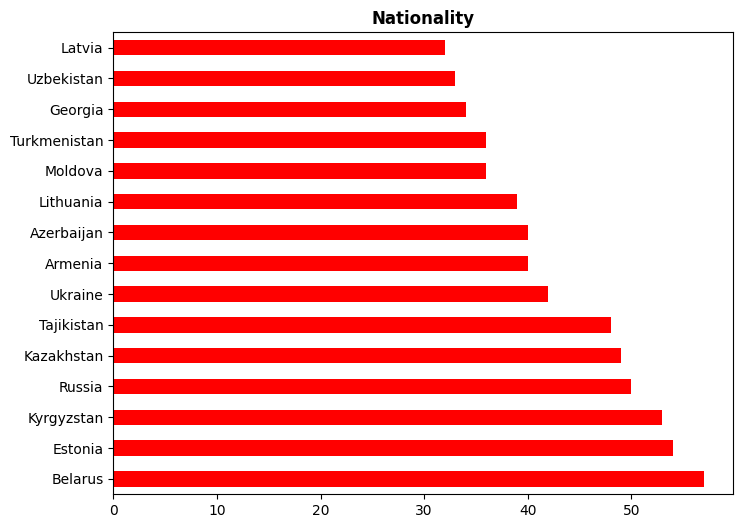

In [42]:
# Displaying the player's nationalities:
ussr['Nationality'].value_counts().plot(kind = 'barh', color = 'red', figsize = (8, 6))
plt.ylabel(None)
plt.title('Nationality', fontweight = 'bold')
plt.show()

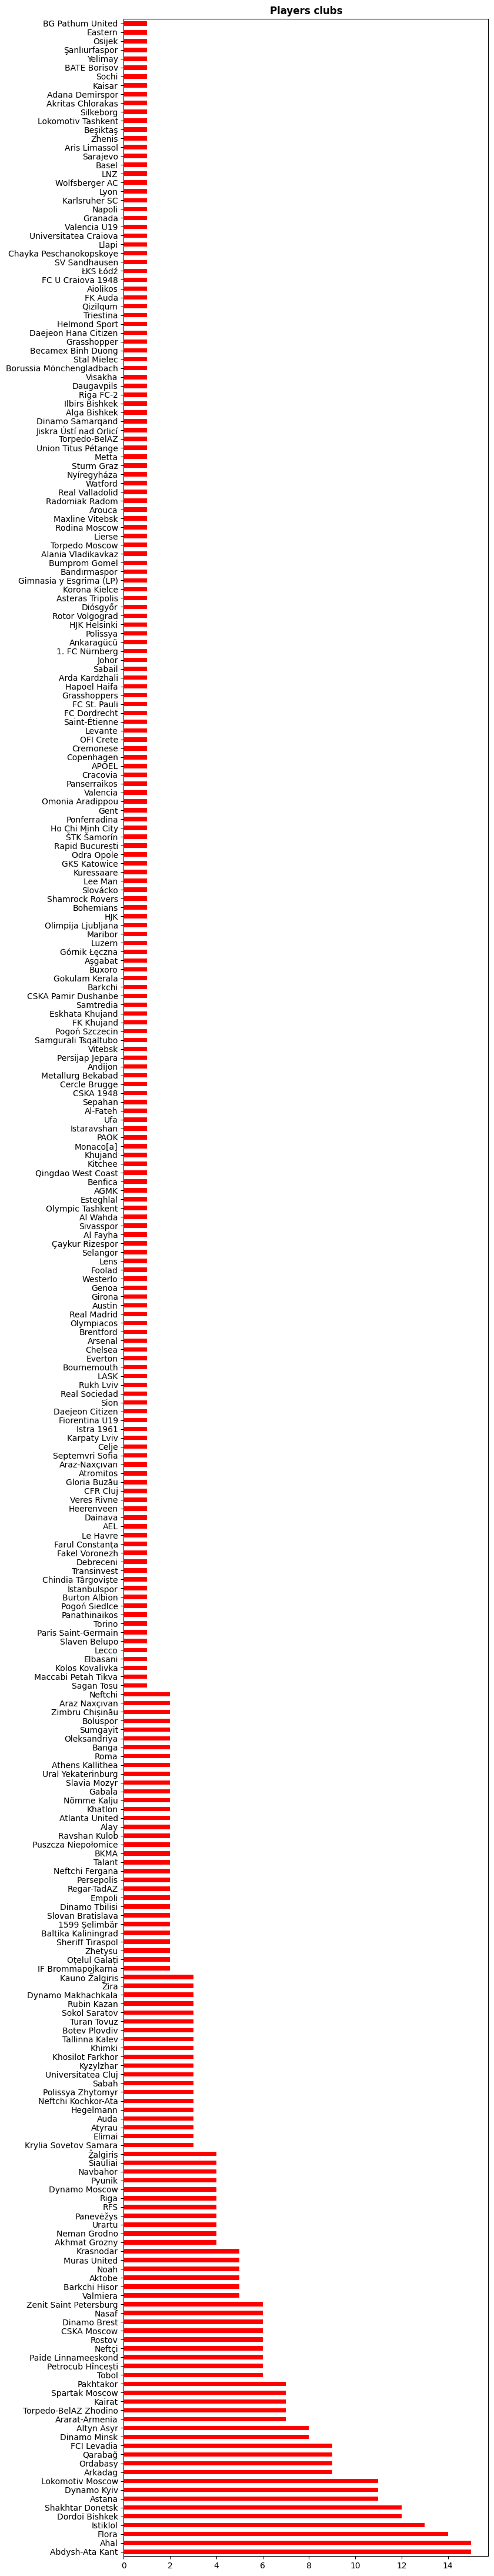

In [43]:
# Displaying the player's clubs:
ussr['Club'].value_counts().plot(kind = 'barh', color = 'red', figsize = (8, 56))
plt.ylabel(None)
plt.title('Players clubs', fontweight = 'bold')
plt.show()

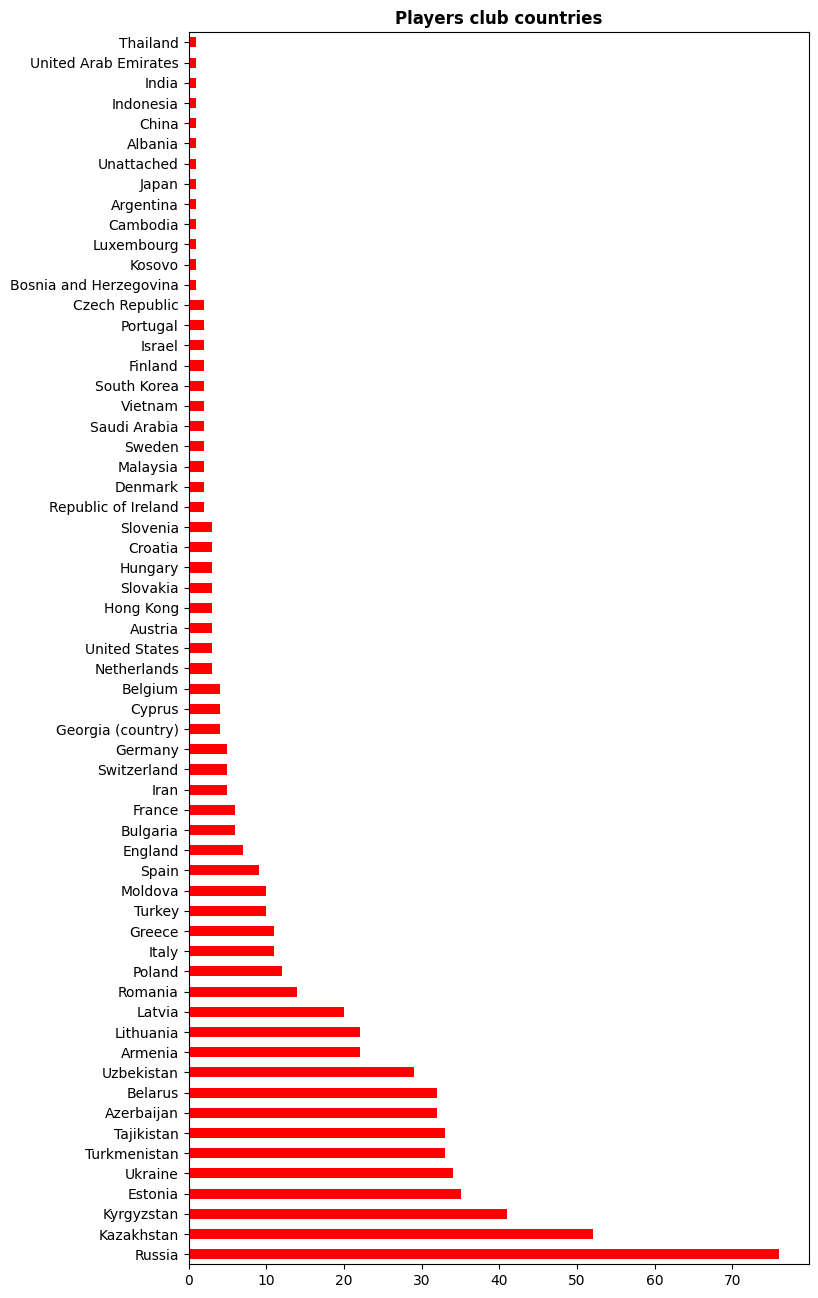

In [44]:
# Displaying the countries of the clubs the players defend:
ussr['Club country'].value_counts().plot(kind = 'barh', color = 'red', figsize = (8, 16))
plt.ylabel(None)
plt.title('Players club countries', fontweight = 'bold')
plt.show()

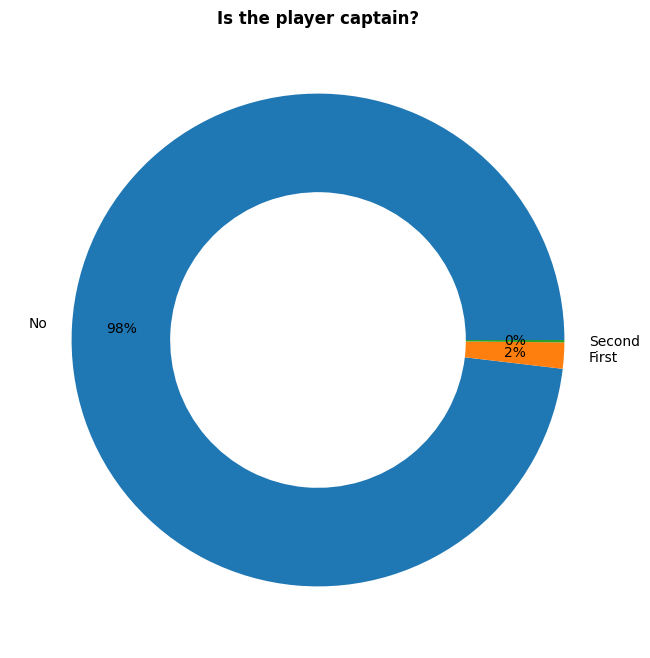

In [45]:
# Displaying if the player is captain of not:
ussr['Captain?'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Is the player captain?', fontweight = 'bold')
plt.show()

In [46]:
# Checking the match count level of the players:
def match_count_level(row):
  num_of_matches = row['Matches']
  if num_of_matches >= 25 and num_of_matches < 50:
    result = 'Over 25 matches played'
  elif num_of_matches >= 50 and num_of_matches < 100:
    result = 'Over 50 matches played'
  elif num_of_matches >= 100 and num_of_matches < 120:
    result = 'Over 100 matches played'
  elif num_of_matches >= 120:
    result = 'Over 120 matches played'
  else:
    result = 'Less than 20 matches played'
  return result

# Applying the function above on a column of the dataset and generating a new column as result:
ussr['Match count level'] = ussr.apply(match_count_level, axis=1)
ussr.head()

,Number,Position,Player,Date of birth,Matches,Goals,Club,Club country,Captain?,Nationality,Match count level
0,1,1. Goalkeeper,Ognjen Čančarević,1989-09-25,17,0,Noah,Armenia,No,Armenia,Less than 20 matches played
1,12,1. Goalkeeper,Arsen Beglaryan,1993-02-18,16,0,Ararat-Armenia,Armenia,No,Armenia,Less than 20 matches played
2,16,1. Goalkeeper,Henri Avagyan,1996-01-16,1,0,Pyunik,Armenia,No,Armenia,Less than 20 matches played
3,3,2. Defender,Varazdat Haroyan (Captain),1992-08-24,89,4,Qingdao West Coast,China,No,Armenia,Over 50 matches played
4,19,2. Defender,Hovhannes Hambardzumyan,1990-10-04,51,4,Noah,Armenia,No,Armenia,Over 50 matches played


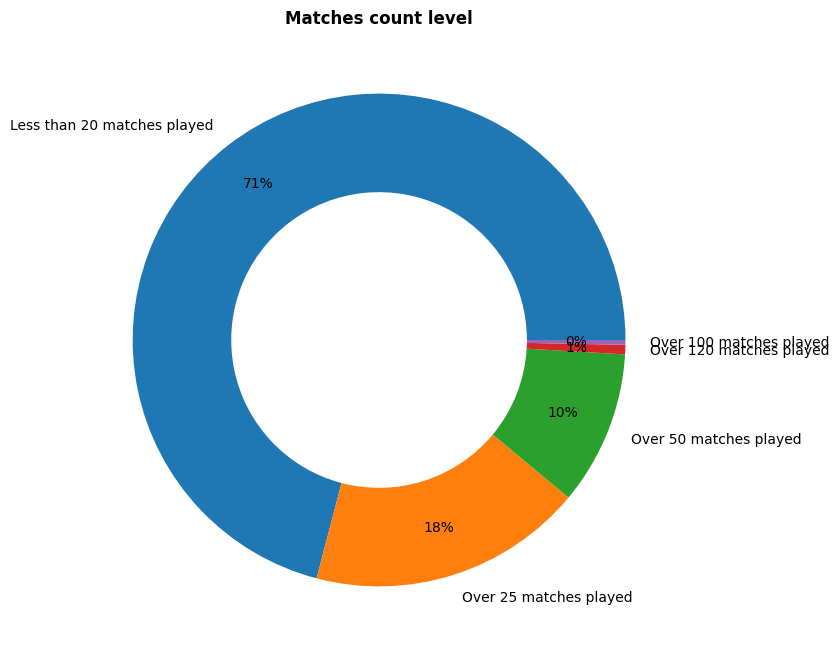

In [47]:
# Displaying the matches count result:
ussr['Match count level'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Matches count level', fontweight = 'bold')
plt.show()

In [48]:
# Checking the goals count level of the players:
def goal_count_level(row):
  num_of_goals = row['Matches']
  if num_of_goals >= 5 and num_of_goals < 10:
    result = 'Over 5 goals scored'
  elif num_of_goals >= 10 and num_of_goals < 20:
    result = 'Over 10 goals scored'
  elif num_of_goals >= 20 and num_of_goals < 40:
    result = 'Over 20 goals scored'
  elif num_of_goals >= 40 and num_of_goals < 50:
    result = 'Over 40 goals scored'
  elif num_of_goals >= 50:
    result = 'Over 50 goals scored'
  else:
    result = 'Less than 5 goals scored'
  return result

# Applying the function above on a column of the dataset and generating a new column as result:
ussr['Goal count level'] = ussr.apply(goal_count_level, axis=1)
ussr.head()

,Number,Position,Player,Date of birth,Matches,Goals,Club,Club country,Captain?,Nationality,Match count level,Goal count level
0,1,1. Goalkeeper,Ognjen Čančarević,1989-09-25,17,0,Noah,Armenia,No,Armenia,Less than 20 matches played,Over 10 goals scored
1,12,1. Goalkeeper,Arsen Beglaryan,1993-02-18,16,0,Ararat-Armenia,Armenia,No,Armenia,Less than 20 matches played,Over 10 goals scored
2,16,1. Goalkeeper,Henri Avagyan,1996-01-16,1,0,Pyunik,Armenia,No,Armenia,Less than 20 matches played,Less than 5 goals scored
3,3,2. Defender,Varazdat Haroyan (Captain),1992-08-24,89,4,Qingdao West Coast,China,No,Armenia,Over 50 matches played,Over 50 goals scored
4,19,2. Defender,Hovhannes Hambardzumyan,1990-10-04,51,4,Noah,Armenia,No,Armenia,Over 50 matches played,Over 50 goals scored


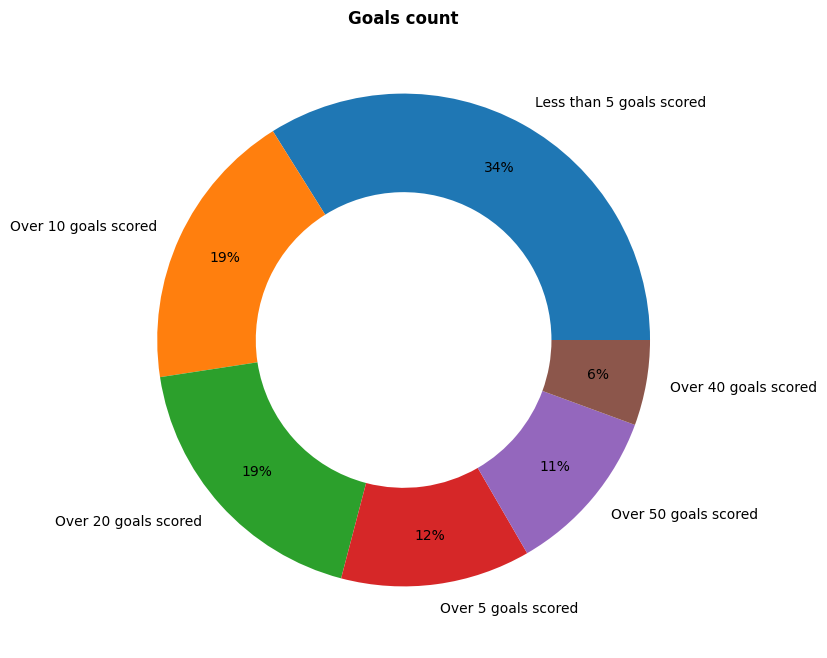

In [49]:
# Displaying the goals count result:
ussr['Goal count level'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Goals count', fontweight = 'bold')
plt.show()

In [50]:
now = date.today()
# Calculate player age and handle NaT values:
# Convert 'Date of birth' to datetime.date before passing to relativedelta
ussr['Age'] = ussr.apply(lambda x: relativedelta(now, x['Date of birth'].date()).years if pd.notna(x['Date of birth']) else pd.NaT, axis=1)
ussr.tail()

,Number,Position,Player,Date of birth,Matches,Goals,Club,Club country,Captain?,Nationality,Match count level,Goal count level,Age
639,NaN,3. Midfielder,Diyor Kholmatov,2002-07-22,5,0,Pakhtakor,Uzbekistan,No,Uzbekistan,Less than 20 matches played,Over 5 goals scored,22
640,NaN,3. Midfielder,Shokhboz Umarov,1999-03-09,5,0,Ordabasy,Kazakhstan,No,Uzbekistan,Less than 20 matches played,Over 5 goals scored,25
641,NaN,3. Midfielder,Jamshid Boltaboev,1996-10-03,4,0,Navbahor,Uzbekistan,No,Uzbekistan,Less than 20 matches played,Less than 5 goals scored,28
642,NaN,4. Striker,Oston Urunov,2000-12-19,32,8,Persepolis,Iran,No,Uzbekistan,Over 25 matches played,Over 20 goals scored,23
643,NaN,4. Striker,Igor Sergeyev,1993-04-30,73,19,BG Pathum United,Thailand,No,Uzbekistan,Over 50 matches played,Over 50 goals scored,31


In [51]:
# Classifying the players by age group:
def age_group(row):
  age = row['Age']

  if age >= 20 and age <= 25:
    return 'Between 20 and 25 years old'
  elif age >= 26 and age <= 30:
    return 'Between 26 and 30 years old'
  elif age >= 31 and age <= 35:
    return 'Between 31 and 35 years old'
  elif age >= 36:
    return '36 or older'
  else:
    return 'Under 20 years old'

# Applying the function above on a column of the dataset and generating a new column as result:
ussr['Age group'] = ussr.apply(age_group, axis=1)
ussr.tail()

,Number,Position,Player,Date of birth,Matches,Goals,Club,Club country,Captain?,Nationality,Match count level,Goal count level,Age,Age group
639,NaN,3. Midfielder,Diyor Kholmatov,2002-07-22,5,0,Pakhtakor,Uzbekistan,No,Uzbekistan,Less than 20 matches played,Over 5 goals scored,22,Between 20 and 25 years old
640,NaN,3. Midfielder,Shokhboz Umarov,1999-03-09,5,0,Ordabasy,Kazakhstan,No,Uzbekistan,Less than 20 matches played,Over 5 goals scored,25,Between 20 and 25 years old
641,NaN,3. Midfielder,Jamshid Boltaboev,1996-10-03,4,0,Navbahor,Uzbekistan,No,Uzbekistan,Less than 20 matches played,Less than 5 goals scored,28,Between 26 and 30 years old
642,NaN,4. Striker,Oston Urunov,2000-12-19,32,8,Persepolis,Iran,No,Uzbekistan,Over 25 matches played,Over 20 goals scored,23,Between 20 and 25 years old
643,NaN,4. Striker,Igor Sergeyev,1993-04-30,73,19,BG Pathum United,Thailand,No,Uzbekistan,Over 50 matches played,Over 50 goals scored,31,Between 31 and 35 years old


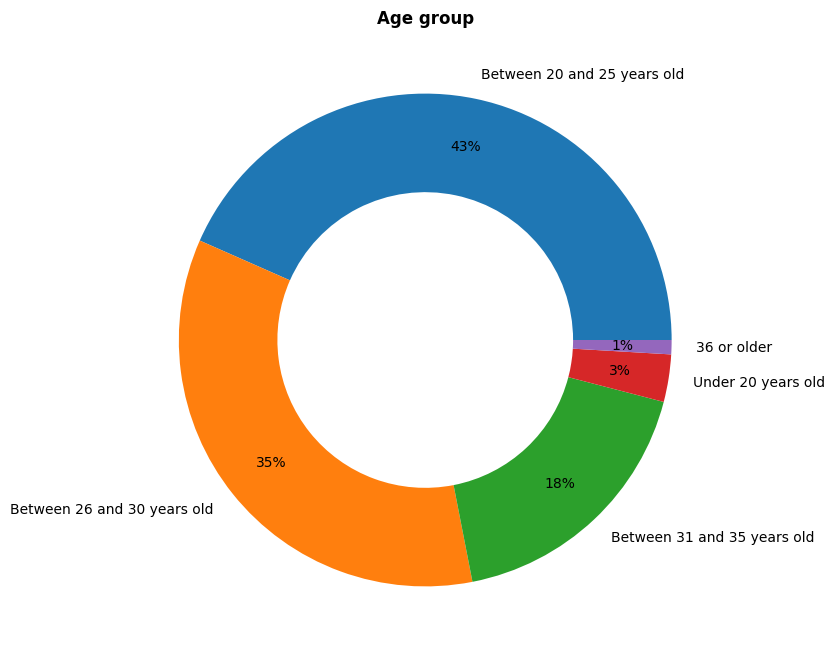

In [52]:
# Displaying the age groups:
ussr['Age group'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Age group', fontweight = 'bold')
plt.show()